In [ ]:
# zadanie 1
# mamy spychacz i losowe punkty
# wiemy gdzie punkty i spychycz 
# okresl najkrotsza mozliwa sciezke tak zeby zebrac wszystkie punkty i wypisz rozwiazanie -- wypisz stringa koment 
# e.g. rgggrgglgglg...

-  https://mathsathome.com/calculating-bearings/#:~:text=If%20given%20the%20bearing%20from,from%20A%20is%20050%C2%B0.

#### Goes to the  n points
does:
- creates all possible ways using permutations and saves them in a list
- finds the shortest ways by iterating through the list of permutations
- keeps all data like steps, history, and ways only for the shortest ways 
- draws all the shortest ways 


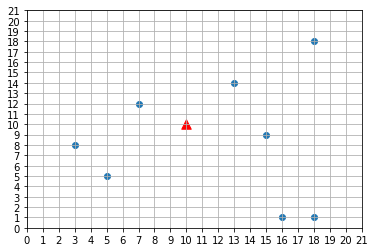

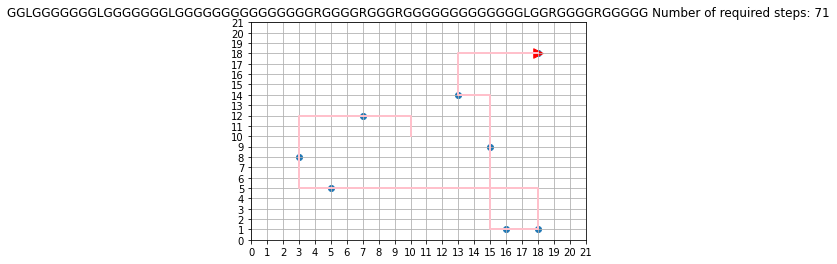

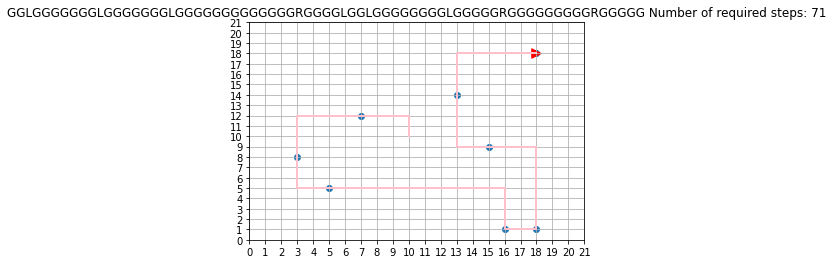

--- 8.347276449203491 seconds ---


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import random
from itertools import permutations
import time

grid = 20
x = int(grid/2)
y = int(grid/2)
n = 9 ## number of points
start_time = time.time()


class Points:
    def __init__(self):
        self.x = [random.randrange(0, grid) for x in range(n)]
        self.y = [random.randrange(0, grid) for x in range(n)]
        
    def coordinates(self):
        return list(zip(self.x, self.y))
    

class Spychacz:
    def __init__(self):
        self.x = x
        self.y = y
        self.a = 0
        self.symbol = '^'
        self.sx = [self.x]
        self.sy = [self.y]
        self.symbols_history = [self.symbol]
        self.symbole = { 0: '^', 90: '>', 180: "v", 270: '<'}
        
    def turn_right(self):
        self.a = (self.a + 90) % 360
        self.symbol = self.symbole[self.a]
        self.symbols_history.append(self.symbol)
    
    def turn_left(self):
        self.a = (self.a - 90) % 360
        self.symbol = self.symbole[self.a]
        self.symbols_history.append(self.symbol)
            
    def step_forward(self):
        if self.a == 0:
            self.y += 1
        if self.a == 90:
            self.x += 1
        if self.a == 180:
            self.y -= 1
        if self.a == 270:
            self.x -= 1
        self.sx.append(self.x)
        self.sy.append(self.y)
        
    def return_steps_history(self):
        return list(zip(self.sx, self.sy))
    
    def coordinates(self):
        return (self.x, self.y)
    
    def change_angle(self, a):
        self.a = a
        self.symbol = self.symbole[a]
            


def draw(points, spychacz):
    plt.scatter(points.x, points.y)
    plt.plot(spychacz.sx, spychacz.sy, color='pink', linewidth='2')
    plt.scatter(spychacz.x, spychacz.y, marker=spychacz.symbol, c='r', s= 90)
    plt.xticks(list(range(grid+ 2)))
    plt.yticks(list(range(grid+ 2)))
    plt.grid()

    plt.show()



class Ways:
    '''
    ways - are composed of paths
    path - is composed of steps between points
    '''
    
    def __init__(self, points_object):
        self.points_object = points_object
        self.points = points_object.coordinates()
        self.all_possible_ways = list() # permutations

        self.shortest_way_number = [99999999999]
        self.shortest_ways_string = list()
        self.shortest_ways_steps_historys = dict()
        self.shortest_ways_spychacz = list()
        
        # generate premutations
        self.generate_permutations() 
                
    
    def generate_permutations(self):
        self.all_possible_ways = list(permutations(self.points))
        
        
    def calculate_path(self, p1, p2, spychacz):
        x = p2[0] - p1[0]
        y = p2[1] - p1[1]

        angle_spychacz = spychacz.a
        point_angle = spychacz.a
        path = ''

        # angle 0     x = 0 and y > 0
        if x == 0 and y > 0:
            if point_angle == 0:
                path += ''.join(['G' for s in range(y)])
            elif point_angle == 90:
                path +=  'L' + ''.join(['G' for s in range(y)])
            elif point_angle == 180:
                path += 'RR' + ''.join(['G' for s in range(y)])
            elif point_angle == 270:
                path += 'R' + ''.join(['G' for s in range(y)])

        # angles 1 - 89      x > 0 and y > 0
        elif x > 0 and y > 0:
            if point_angle == 0:
                path += ''.join(['G' for s in range(y)]) + 'R' + ''.join(['G' for s in range(x)])
            elif point_angle == 90:
                path +=  ''.join(['G' for s in range(x)]) + 'L' + ''.join(['G' for s in range(y)])
            elif point_angle == 180:
                path += 'L' + ''.join(['G' for s in range(x)]) + 'L' + ''.join(['G' for s in range(y)])
            elif point_angle == 270:
                path += 'R' + ''.join(['G' for s in range(y)]) + 'R' + ''.join(['G' for s in range(x)])           

        # angle 90    y = 0 and x > 0
        elif y == 0 and x > 0:
            if point_angle == 0:
                path += 'R' + ''.join(['G' for s in range(x)])
            elif point_angle == 90:
                path +=  ''.join(['G' for s in range(x)])
            elif point_angle == 180:
                path += 'L' + ''.join(['G' for s in range(x)])
            elif point_angle == 270:
                path += 'LL' + ''.join(['G' for s in range(x)])

        # angles 91 - 179    x > 0 and y < 0
        elif x > 0 and y < 0:
            y *= -1
            if point_angle == 0:
                path += 'R' + ''.join(['G' for s in range(x)]) + 'R' + ''.join(['G' for s in range(y)])
            elif point_angle == 90:
                path += ''.join(['G' for s in range(x)]) + 'R' + ''.join(['G' for s in range(y)])
            elif point_angle == 180:
                path += ''.join(['G' for s in range(y)]) + 'L' + ''.join(['G' for s in range(x)])
            elif point_angle == 270:
                path += 'L' + ''.join(['G' for s in range(y)]) + 'L' + ''.join(['G' for s in range(x)])

        # angle 180   x = 0 and y < 0
        elif x == 0 and y < 0:
            y *= -1
            if point_angle == 0:
                path += 'RR' + ''.join(['G' for s in range(y)])
            elif point_angle == 90:
                path += 'R' + ''.join(['G' for s in range(y)])
            elif point_angle == 180:
                path += ''.join(['G' for s in range(y)])
            elif point_angle == 270:
                path += 'L' + ''.join(['G' for s in range(y)])

        # angles 181 - 269   x  < 0 and y < 0
        elif x  < 0 and y < 0:
            y *= -1
            x *= -1
            if point_angle == 0:
                path += 'L' + ''.join(['G' for s in range(x)]) + 'L' + ''.join(['G' for s in range(y)])
            elif point_angle == 90:
                path += 'R' + ''.join(['G' for s in range(y)]) + 'R' +   ''.join(['G' for s in range(x)])
            elif point_angle == 180:
                path += ''.join(['G' for s in range(y)]) + 'R' +   ''.join(['G' for s in range(x)])
            elif point_angle == 270:
                path += ''.join(['G' for s in range(x)]) + 'L' + ''.join(['G' for s in range(y)])

        # angle 270   y = 0 and x < 0 
        elif y == 0 and x < 0:
            x *= -1
            if point_angle == 0:
                path += 'L' + ''.join(['G' for s in range(x)])
            elif point_angle == 90:
                path +=  'LL' + ''.join(['G' for s in range(x)])
            elif point_angle == 180:
                path += 'R' + ''.join(['G' for s in range(x)])
            elif point_angle == 270:
                path += ''.join(['G' for s in range(x)])

        # angles 271 - 359   x < 0 and y > 0
        elif x < 0 and y > 0:
            x *= -1
            if point_angle == 0:
                path += ''.join(['G' for s in range(y)]) + 'L' + ''.join(['G' for s in range(x)])
            elif point_angle == 90:
                path += 'L' + ''.join(['G' for s in range(y)]) + 'L' + ''.join(['G' for s in range(x)])
            elif point_angle == 180:
                path += 'R' + ''.join(['G' for s in range(x)]) + 'R' + ''.join(['G' for s in range(y)])
            elif point_angle == 270:
                path += ''.join(['G' for s in range(x)]) + 'R' + ''.join(['G' for s in range(y)])
            
        return path
    
    
    def move(self, user_input, spychacz):
        for e in user_input:
            if e.upper() == 'R':
                spychacz.turn_right()
            elif e.upper() == 'L':
                spychacz.turn_left()
            elif e.upper() == 'G':
                spychacz.step_forward()
            else:
                continue
                
                
    def generate_ways(self):
        for way in self.all_possible_ways:
            way_string = ''
            spychacz = Spychacz()
            for path in way:
                path = self.calculate_path(spychacz.coordinates(),path, spychacz)
                self.move(path, spychacz)
                way_string += path
                
            if len(way_string) < self.shortest_way_number[0]:
                    # new shortes
                self.shortest_way_number = [len(way_string)]
                self.shortest_ways_string = [way_string]
                self.shortest_ways_steps_historys = {way_string: {'x': spychacz.sx, 'y': spychacz.sy}}
                self.shortest_ways_spychacz = [spychacz]
                
            elif len(way_string) == self.shortest_way_number[0]:
                    # found more
                self.shortest_way_number.append(len(way_string))
                self.shortest_ways_string.append(way_string)
                self.shortest_ways_steps_historys[way_string] = {'x': spychacz.sx, 'y': spychacz.sy}
                self.shortest_ways_spychacz.append(spychacz)

    
    def draw_shortest(self):
        for index, way in enumerate(self.shortest_ways_string):
            plt.scatter(self.points_object.x, self.points_object.y)
            plt.plot(self.shortest_ways_spychacz[index].sx, self.shortest_ways_spychacz[index].sy, color='pink', linewidth='2')
            plt.scatter(self.shortest_ways_spychacz[index].x, self.shortest_ways_spychacz[index].y, marker=self.shortest_ways_spychacz[index].symbol, c='r', s= 90)
            plt.xticks(list(range(grid+ 2)))
            plt.yticks(list(range(grid+ 2)))
            plt.grid()
            plt.title(way + ' Number of required steps: ' + str(len(way)))
            plt.show()
        
    

    
points = Points() # creates points
draw(points, Spychacz()) # plots points and spychacz

ways = Ways(points) 
ways.generate_ways()

ways.draw_shortest()
    
print("--- %s seconds ---" % (time.time() - start_time))